# Summary Stats on AFT Dataset

**Author:** Jim Maddock

**Last Updated:** 5-29-20

**Description:** Basic summary stats for the AFT Dataset.  This notebook should:
* Summarize the total number of:
    * comments
    * articles
    * users
    

* Summarize the number of labeled comments for classes:
    * oversight
    * hide
    * flag
    * inappropriate
    * helpful
    * unhelpful

In [1]:
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')

In [4]:
filePath = '/Users/klogg/research_data/aft/raw/dump_03-24-20.csv'

dtypes = {
    'aft_id':object
}

df = pd.read_csv(filePath,escapechar='\\', encoding='latin-1', dtype=dtypes)

In [72]:
## list of column names
df.columns

Index(['aft_id', 'aft_page', 'aft_page_revision', 'aft_user', 'aft_user_text',
       'aft_user_token', 'aft_form', 'aft_cta', 'aft_link', 'aft_rating',
       'aft_comment', 'aft_timestamp', 'aft_oversight', 'aft_decline',
       'aft_request', 'aft_hide', 'aft_autohide', 'aft_flag', 'aft_autoflag',
       'aft_feature', 'aft_resolve', 'aft_noaction', 'aft_inappropriate',
       'aft_archive', 'aft_archive_date', 'aft_helpful', 'aft_unhelpful',
       'aft_has_comment', 'aft_net_helpful', 'aft_relevance_score',
       'aft_discuss', 'aft_claimed_user'],
      dtype='object')

## Basic Stats

In [92]:
## number of rows
print('number of rows: {0}'.format(len(df)))

## number of comments
print('number of unique comments: {0}'.format(df['aft_id'].nunique()))

## check whether all comments are have a unique id
print('all comments have unique id: {0}'.format(len(df['aft_id'].unique()) == len(df['aft_id'])))

## check how many rows have duplicate ids
dups = df.groupby('aft_id').size().to_frame('count')
num_dups = len(dups.loc[dups['count'] > 1])
print('number of aft_ids with more than one comment: {0}'.format(num_dups))

## number of unqiue pages
print('number of unique pages: {0}'.format(df['aft_page'].nunique()))

## number of unique users
print('number of unique users: {0}'.format(df['aft_user'].nunique()))

number of rows: 937396
number of unique comments: 910571
all comments have unique id: False
number of aft_ids with more than one comment: 26060
number of unique pages: 161550
number of unique users: 18958


## entries with non-unique aft_id
These seem to be entirely different enteries.  Different users, pages, revs, and comments

In [85]:
dups.sort_values('count',ascending=False)
df.loc[df['aft_id'] == '69900000000000000000000000000000']

,aft_id,aft_page,aft_page_revision,aft_user,aft_user_text,aft_user_token,aft_form,aft_cta,aft_link,aft_rating,...,aft_inappropriate,aft_archive,aft_archive_date,aft_helpful,aft_unhelpful,aft_has_comment,aft_net_helpful,aft_relevance_score,aft_discuss,aft_claimed_user
657035,69900000000000000000000000000000,13443,466899639,0,220.227.252.234,mP8tPNhIAU6c4nqnksjioaJQKBqyiR7A,1,1,X,1,...,0,0,20131223122253,0,0,0,0,0,N,0
657036,69900000000000000000000000000000,27289438,469564655,0,94.11.29.245,ZM4OhJ1EyMbQYxnL0z4WTqHoMelA8gsn,1,1,X,0,...,1,0,20140110203101,0,0,1,0,-50,N,0
657037,69900000000000000000000000000000,17804346,465823544,0,92.251.210.17,G6WFge9mrS8Xd3TDsLTcbFDuFNpJe6dl,1,1,X,1,...,0,0,20140328164814,0,0,0,0,0,N,0
657038,69900000000000000000000000000000,75977,525313092,0,115.245.178.159,TEU4M15uIPF7Cy6Y7tdp9jzciceFrQZ6,6,4,X,0,...,0,0,20141204133452,0,0,1,0,0,N,0


## Comments & ratings

In [114]:
assert(len(df.loc[df['aft_comment'].isnull()]) + len(df.loc[df['aft_comment'].notnull()]) == len(df))
print('number of rows with comments: {0}'.format(len(df.loc[df['aft_comment'].notnull()])))
print('percent of rows with comments: {0:.2f}'.format((len(df.loc[df['aft_comment'].notnull()])/len(df))*100))
print('percent of rows with positive ratings: {0:.2f}'.format((len(df.loc[df['aft_rating'] == 1])/len(df))*100))


number of rows with comments: 675616
percent of rows with comments: 72.07
percent of rows with positive ratings: 50.00
percent of rows with oversight: 0.00
percent of rows that were hidden: 1.92


## Oversight

In [138]:
print('number rows with oversight: {0}'.format((len(df.loc[df['aft_oversight'] > 0]))))
print('number rows with oversight declined: {0}'.format((len(df.loc[df['aft_decline'] > 0]))))
print('number rows with oversight request: {0}'.format((len(df.loc[df['aft_request'] > 0]))))

number rows with oversight: 0
number rows with oversight declined: 2
number rows with oversight request: 0


In [139]:
print('number of rows that were hidden: {0}'.format((len(df.loc[df['aft_hide'] == 1]))))
print('percent of rows that were hidden: {0:.2f}'.format((len(df.loc[df['aft_hide'] == 1])/len(df))*100))
print('number of rows that were auto hidden: {0}'.format((len(df.loc[df['aft_autohide'] == 1]))))
print('percent of rows that were auto hidden: {0:.2f}'.format((len(df.loc[df['aft_autohide'] == 1])/len(df))*100))

number of rows that were hidden: 18043
percent of rows that were hidden: 1.92
number of rows that were auto hidden: 113
percent of rows that were auto hidden: 0.01


In [136]:
print('number of rows marked as abusive: {0}'.format((len(df.loc[df['aft_flag'] > 0]))))
print('percent of rows marked as abusive: {0:.2f}'.format((len(df.loc[df['aft_flag'] > 0]))/len(df)*100))
print('distribution of number of times a comment was flagged:')
print(df.groupby('aft_flag').size())

number of rows marked as abusive: 22278
percent of rows marked as abusive: 2.38
distribution of number of times a comment was flagged:
aft_flag
0     915118
1      19997
2       1678
3        374
4        118
5         48
6         22
7         25
8          5
9          4
10         3
11         1
12         1
13         1
20         1
dtype: int64


In [140]:
print('number of rows auto-marked as abusive: {0}'.format((len(df.loc[df['aft_autoflag'] > 0]))))
print('percent of rows auto-marked as abusive: {0:.2f}'.format((len(df.loc[df['aft_autoflag'] > 0]))/len(df)*100))

number of rows auto-marked as abusive: 3128
percent of rows auto-marked as abusive: 0.33


In [157]:
print('number of rows that were useful: {0}'.format((len(df.loc[df['aft_feature'] == 1]))))
print('percent of rows that were useful: {0:.2f}'.format((len(df.loc[df['aft_feature'] == 1])/len(df))*100))
print()

print('number of rows that were resolved: {0}'.format((len(df.loc[df['aft_resolve'] == 1]))))
print('percent of rows that were resolved: {0:.2f}'.format((len(df.loc[df['aft_resolve'] == 1])/len(df))*100))
print()

noaction = len(df.loc[df['aft_noaction'] == 1])
print('number of rows that were not actionable: {0} ({1:.2f}%)\n'.format(noaction,(noaction/len(df))*100))

inappropriate = len(df.loc[df['aft_inappropriate'] == 1])
print('number of rows that were inappropriate: {0} ({1:.2f}%)\n'.format(inappropriate,(inappropriate/len(df))*100))

helpful = len(df.loc[df['aft_helpful'] > 0])
print('number of rows that were marked as helpful: {0} ({1:.2f}%)'.format(helpful,(helpful/len(df))*100))
print('distribution of number of times a comment was marked as helpful:')
print(df.groupby('aft_helpful').size())
print()

unhelpful = len(df.loc[df['aft_unhelpful'] > 0])
print('number of rows that were marked as unhelpful: {0} ({1:.2f}%)'.format(unhelpful,(unhelpful/len(df))*100))
print('distribution of number of times a comment was marked as unhelpful:')
print(df.groupby('aft_unhelpful').size())

number of rows that were useful: 10714
percent of rows that were useful: 1.14

number of rows that were resolved: 22643
percent of rows that were resolved: 2.42

number of rows that were not actionable: 48650 (5.19%)

number of rows that were inappropriate: 9138 (0.97%)

number of rows that were marked as helpful: 57262 (6.11%)
distribution of number of times a comment was marked as helpful:
aft_helpful
0     880134
1      45433
2       8080
3       2127
4        788
5        342
6        175
7         90
8         57
9         34
10        26
11        18
12        20
13        13
14        10
15         4
16         7
17         5
18         3
19         3
20         1
21         2
22         1
23         4
25         2
26         2
27         2
28         2
31         2
33         1
34         2
58         3
59         1
64         1
97         1
dtype: int64

number of rows that were marked as unhelpful: 73724 (7.86%)
distribution of number of times a comment was marked as unhelpfu

In [158]:
no_rating = len(df.loc[(df['aft_unhelpful'] == 0) & (df['aft_helpful'] == 0)])
print('number of rows that were not rated: {0} ({1:.2f}%)'.format(no_rating,(no_rating/len(df))*100))

number of rows that were not rated: 822412 (87.73%)


### AFT Relevance Score
Most of the relevance score is irrelivant to this analysis becaused it's calculated based on rule-based scoring from labels already in this dataset.  We should be able to do better with ML.

In [161]:
df.groupby('aft_relevance_score').size().sort_values(ascending=False)

aft_relevance_score
 0      725006
-5       59911
-1       34026
 1       28262
-50      24970
         ...  
-174         1
-177         1
-181         1
-182         1
-300         1
Length: 200, dtype: int64

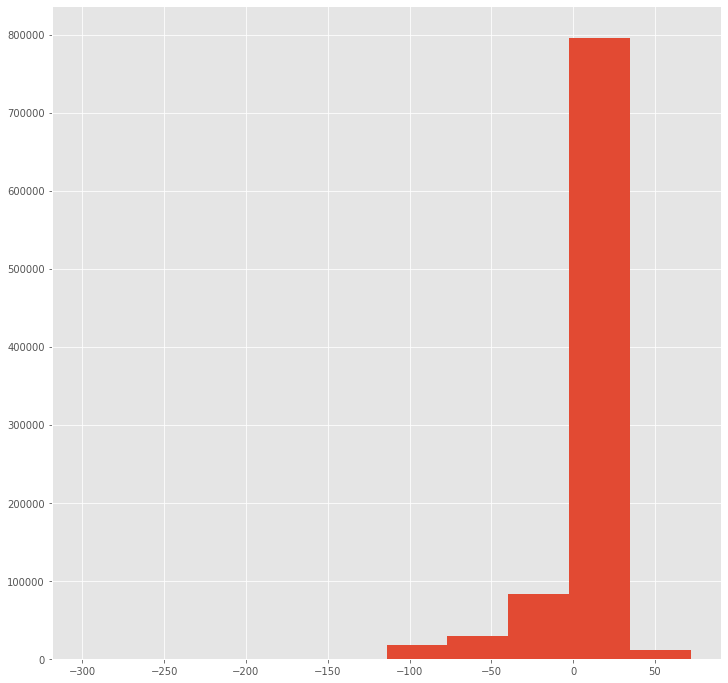

In [8]:
df['aft_relevance_score'].hist(figsize=(12,12))

In [165]:
pos_r = len(df.loc[df['aft_relevance_score'] > 0])
print('number of rows that had > 0 relevance: {0} ({1:.2f}%)'.format(pos_r,(pos_r/len(df))*100))
neg_r = len(df.loc[df['aft_relevance_score'] < 0])
print('number of rows that had < 0 relevance: {0} ({1:.2f}%)'.format(neg_r,(neg_r/len(df))*100))

number of rows that had > 0 relevance: 44573 (4.75%)
number of rows that had < 0 relevance: 167817 (17.90%)


In [6]:
df.groupby('aft_form').size()

aft_form
0         3
1     51901
6    885492
dtype: int64